## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Project Overview

This project will employ exploratory data analysis to generate actionable insights that inform strategic decisions for business stakeholders.

# Business Understanding

As major companies increasingly invest in original video content, our company has decided to enter the entertainment industry by launching a new movie studio. However, the organization currently lacks experience in film production and does not have a clear strategy for deciding what types of movies to create.

The primary business goal of this project is to reduce the risk associated with entering the movie industry by using data-driven insights to understand which types of films are performing best at the box office today and identify patterns related to movie genre, rating, viewership, and finanical performance (income generation and production costs).

By analyzing current box office trends and successful films, this project will provide actionable insights that can guide the leadership of the new movie studio in making informed decisions about what kinds of movies to produce. These insights will help the studio prioritize film types that are more likely to achieve commercial success, maximize return on investment, and compete effectively with established studios.

Ultimately, the findings from this analysis will support strategic decision-making around film development, allowing the company to enter the market with a clearer understanding of audience demand and industry trends.

## Business Goal

To determine which movie genres are the most commercially successful and financially viable.

## Business Question

What movie genres are the most commercially successful and financially viable?

### Specific Questions:

1. Which genres are commonly produced?

2. Which genres received the highest audience ratings?

    * Were these differences statistically significant?

3. Which genres attracted the largest audiences/ viewership?

    * Were these differences statistically significant?

4. What was the production costs of the 5 most common movie genres?

5. What was the income generated from the 5 most common movie genres?

#### Sub-analysis

1. What is the relationship between production budget and ratings?

2. What is the relationship between production costs and gross income?


# Data Understanding

## Data Source and Description

For this project, we will leverage multiple data sources to identify the most promising types of films to produce:

1. IMDB – Provided in SQL database format, containing detailed movie metadata, ratings, and cast/crew information.

2. Box Office Mojo – CSV/TSV files with box office performance data, including domestic and international gross.

3. The Numbers – CSV/TSV files offering financial data such as production budgets, box office performance, and revenue trends.

These diverse sources will allow us to combine financial, audience, and critical metrics to generate actionable insights for the new movie studio.


# Data Preparation and Cleaning

For this section, we will analyze each Data Source individually and in each, we will aim to:

1. To read into the Data Source.

2. Select the Columns that we plan to use to answer our business questions.

3. Check through the data in the Sources to sort out any missing or duplicate data.

4. Save the 'New' Data of the 4 Data Sources as different pandas files.

In [2]:
# Import sqlite3, pandas and numpy to help in data cleaning

import sqlite3
import pandas as pd
import numpy as np


#### Starting off with the IMDB SQL file

In [ ]:
# Starting off with the IMDB file which is an SQLite format
# We first need to unzip it using necessary libraries

import zipfile
from pathlib import Path

import zipfile
from pathlib import Path

# Path to the zip file
zip_path = Path('C:/Users/PC/Desktop/movies_project/dsc-phase-2-project-v3/zippedData/im.db.zip')

# Folder to extract to
extract_folder = zip_path.parent  # same folder as the zip file

# Open and extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)


In [ ]:
# Next we read into the IMDB file by creating connection then using Pandas_SQL to read

# Create a connection

conn = sqlite3.connect('C:/Users/PC/Desktop/movies_project/dsc-phase-2-project-v3/zippedData/im.db')

cursor = conn.cursor()

# read into the file using Pandas-SQL query and see the tables that we have

tables = pd.read_sql_query("""
SELECT *
FROM sqlite_master
WHERE type = 'table';
""", conn)

print(tables)

In [ ]:
# From this IMDB SQL file, we are only interested in the averagerating and ordering columns
# We will extract these and store them as a pandas dataframe

IMDB_df = pd.read_sql_query("""
SELECT mb.movie_id, mb.genres, mr.movie_id, mr.averagerating, mr.numvotes, ma.ordering
FROM movie_basics as mb
JOIN movie_ratings as mr
ON mb.movie_id = mr.movie_id
JOIN movie_akas as ma
ON mr.movie_id = ma.movie_id
GROUP BY mb.genres;
""", conn)

# Let us check the IMDB_df to confirm that we have the columns of choice
IMDB_df.head() # great, we have created a pandas dataframe with only the columns we need from the SQL file

##### Data cleaning and saving of the IMDB_df

In [ ]:
# check for missing data
IMDB_df.isna().sum() # There is only 1 missing data in the genres.

# Checking the length of the IMDB_df
len(IMDB_df) # There is 915 data entries. So we will just drop the 1 missing value without any effect on analysis

# dropping the missing value and saving using inplace = True
IMDB_df.dropna(inplace = True)

# confirming that we have dropped the 1 missing value
IMDB_df.isna().sum() # We have dropped the missing value

In [ ]:
# Next we check for any duplicate data within the IMDB_df
IMDB_df.duplicated().sum() # There are no duplicated values

In [ ]:
# Checking the general information of the IMDB dataframe before saving it, and confirming that our values for average rating, num of votes and ordering are numerical
IMDB_df.info() # the IMDB_df data have the right data-type designation

In [ ]:
# To make analysis easier later and make pushing easier as well, we will save our IMDB_df as a csv file and place index = False to prevent duplication of indices
IMDB_df.to_csv('IMDB_data.csv', index = False)

#### Next we read into, clean and save our Box Office Mojo Data

In [ ]:
# read our csv file using pandas
box_office_df = pd.read_csv('C:/Users/PC/Desktop/movies_project/dsc-phase-2-project-v3/zippedData/bom.movie_gross.csv.gz')

# confirm that we have read into the file
box_office_df['title'].head()

# This data seems not to group the movies in genres but instead has individual movie titles. We will use our business understanding and research to classify our movie titles into movie genres later during analysis.

In [ ]:
# Checking the columns in the box_office_df
box_office_df.columns # we are only interested in the title, domestic_gross and foreign_gross columns

# selecting the columns
box_office_df = box_office_df[['title', 'domestic_gross', 'foreign_gross']] # we have focused on the columns of interest


In [ ]:
# Checking the general information of the dataframe to confirm that the columns have the right data type designation

box_office_df.info() # All are okay apart from the foreign_gross which is designated as object yet it is expected to be numerical for us to analyze it
# we will first get rid of all missing values then convert the foreign_gross data to numerical

##### Data Cleaning and Saving the Box_office_df

In [ ]:
# checking for missing data and total length of the dataframe
box_office_df.isna().sum() # There are 28 domestic gross missing values and 1350 missing foreign gross values
len(box_office_df) # There are a total of 3387 data entries. The missing 1350 values make up approximately 40% of the total data. Replacing all this data with mean or median might distort the analysis, therefore we opt to drop all missing values.

# dropping missing values and saving using inplace = True.
box_office_df.dropna(inplace = True)

# confirming whether there are any remaining missing values
box_office_df.isna().sum() # All missing values are dropped.

In [ ]:
# Converting foreign_gross from object to numerical data type
box_office_df['foreign_gross'] = box_office_df['foreign_gross'] .replace('[\$,]', '', regex=True).astype(float)

# confirming that the data types in the box_office df are now in order
box_office_df.info() #Achieved

In [ ]:
# saving the box_office_df for later analysis

box_office_df.to_csv('box_office_data', index = False)

#### Finally, we read into our final selected movie data source - The Numbers Data

In [ ]:
# Read using pandas
numbers_df = pd.read_csv("C:/Users/PC/Desktop/movies_project/dsc-phase-2-project-v3/zippedData/tn.movie_budgets.csv.gz", sep = ",", encoding = "latin1")

# check that our file has been read
numbers_df.head()

# Checking the columns in the data
numbers_df.columns

# select only the columns we need
numbers_df = numbers_df[['movie', 'production_budget', 'domestic_gross', 'worldwide_gross']]

##### Data cleaning and Saving the Numbers_df

In [ ]:
# checking for missing data
numbers_df.isna().sum() # There are no missing values

# Checking for duplicates
numbers_df.duplicated().sum() # There are no duplicated values

# checking into the datatypes of the columns before saving our data
numbers_df.info() # the production budget, domestic gross and worldwide gross are all objects. 

# converting objects into numerical data types
numbers_df['production_budget'] = numbers_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)  
numbers_df['domestic_gross'] = numbers_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)  
numbers_df['worldwide_gross'] = numbers_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)  

# recheck the datatypes to confirm the change
numbers_df.info() # Change has been effected

In [ ]:
# Saving our edited Numbers_df

numbers_df.to_csv('Numbers_data')

# Data Analysis and Visualization

* Note: For the purposes of collaboration, the 3 csv files were created, therefore, in the subsequent sections, since the data is not located in a similar location for all collaborators, we will use panda's 'pd.read_csv' to read into our edited, cleaned, saved csv files before the start of analysis and visualization.

Business Question 1: Which genres are commonly produced?

In [67]:
# Using the IMDB_df
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('IMDB_data.csv') 
IMDB_df.dropna(subset=['genres'], inplace=True)

# Split "Action,Adventure" -> "Action", "Adventure" (Separate rows)
IMDB_df = IMDB_df.assign(genres=IMDB_df['genres'].str.split(',')).explode('genres')

# Count the movies per genre and take the Top 10
genre_counts = IMDB_df['genres'].value_counts().head(10).reset_index()
genre_counts.columns = ['Genre', 'Count'] # Rename for cleaner plotting
genre_counts
    


,Genre,Count
0,Drama,213
1,Comedy,185
2,Documentary,173
3,Action,153
4,Adventure,138
5,Thriller,126
6,Horror,125
7,Family,121
8,Romance,120
9,Fantasy,116


/var/folders/3y/bjkqm5vj1nbfr18tz3hxdwym0000gn/T/ipykernel_70660/3564664978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='Genre', data=genre_counts, palette=custom_palette)


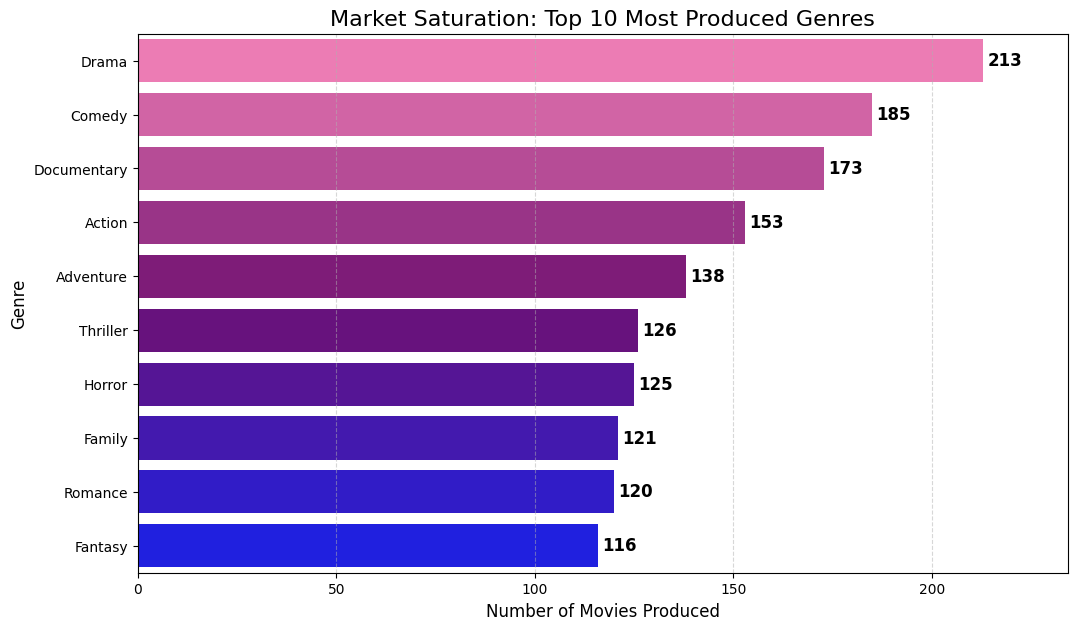

In [68]:
# Visualization
#CREATE PLOT
plt.figure(figsize=(12, 7))

# Create a custom pink-purple-blue palette
# We blend from pink (#ff69b4) to purple (#800080) to blue (#0000ff)
custom_palette = sns.blend_palette(["#ff69b4", "#800080", "#0000ff"], n_colors=10)

# Create Horizontal Bar Plot with the custom palette
ax = sns.barplot(x='Count', y='Genre', data=genre_counts, palette=custom_palette)

# 4. ADD LABELS (The counts at the end of each bar)
# This loop adds the exact number (e.g., "2500") to the end of the bar
for i in ax.containers:
    ax.bar_label(i, padding=3, fontsize=12, fontweight='bold')

# 5. FORMATTING
plt.title('Market Saturation: Top 10 Most Produced Genres', fontsize=16)
plt.xlabel('Number of Movies Produced', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xlim(0, genre_counts['Count'].max() * 1.1) # Add space on right for labels
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()


Business Question 2: Which genres received the highest audience rating? (average rating and number of votes)

In [81]:
# Assuming IMDB_df is your dataframe
genre_ratings = (
    IMDB_df
    .groupby('genres')
    .agg(
        avg_rating=('averagerating', 'mean'),
        total_votes=('numvotes', 'sum')
    )
    .sort_values(by='avg_rating', ascending=False)
)

print(genre_ratings.head())

top_10_ratings = (
    genre_ratings[genre_ratings['total_votes'] > 50]
    .sort_values(by='avg_rating', ascending=False)
    .head(10)
)

# 5. Display the result
print("Top 10 Highest Rated Genres (with >50 movies):")
print(top_10_ratings)

             avg_rating  total_votes
genres                              
Documentary    7.351445       253867
Game-Show      7.300000         3469
News           6.861765         2586
Music          6.686207       446132
Biography      6.680000       658514
Top 10 Highest Rated Genres (with >50 movies):
             avg_rating  total_votes
genres                              
Documentary    7.351445       253867
Game-Show      7.300000         3469
News           6.861765         2586
Music          6.686207       446132
Biography      6.680000       658514
Reality-TV     6.460000          295
War            6.440984       456806
History        6.402679       520699
Animation      6.347321       479404
Drama          6.310798      5554183


/var/folders/3y/bjkqm5vj1nbfr18tz3hxdwym0000gn/T/ipykernel_70660/2384543507.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='avg_rating', y='genres', data=top_10_ratings, palette=custom_palette)


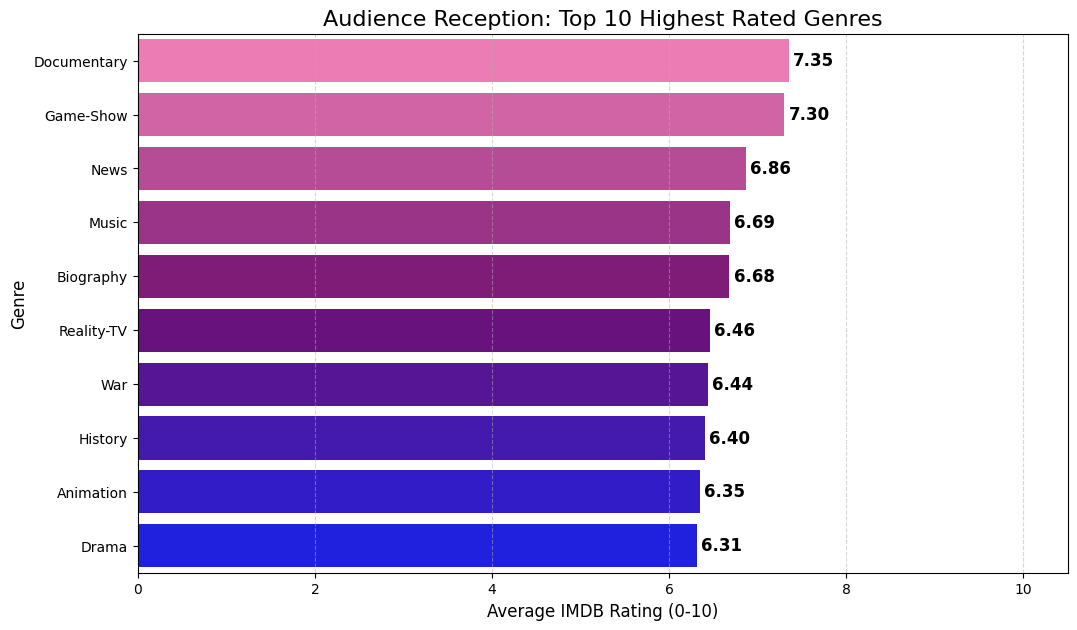

In [83]:


# 1. PREPARE THE DATA
# We ensure the index is reset so 'genres' becomes a proper column
# We check if 'genres' is already a column or if it's the index
if 'genres' not in top_10_ratings.columns:
    top_10_ratings = top_10_ratings.reset_index()

# 2. CREATE PLOT
plt.figure(figsize=(12, 7))

# Create the Custom Pink-Purple-Blue Palette
custom_palette = sns.blend_palette(["#ff69b4", "#800080", "#0000ff"], n_colors=10)

# Plot Horizontal Bar Chart
# FIX 1: Changed x='averagerating' to x='avg_rating'
ax = sns.barplot(x='avg_rating', y='genres', data=top_10_ratings, palette=custom_palette)

# 3. ADD LABELS
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=3, fontsize=12, fontweight='bold')

# 4. FORMATTING
plt.title('Audience Reception: Top 10 Highest Rated Genres', fontsize=16)
plt.xlabel('Average IMDB Rating (0-10)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xlim(0, 10.5) 
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

In [71]:
# Ensure scipy is installed, then import stats
%pip install scipy --quiet
import scipy.stats as stats

# Using the ANOVA test to assess for statistical significance
# We'll explode multi-genre entries so we can count individual genres and pick truly popular ones
genre_exploded = IMDB_df.assign(genres=IMDB_df['genres'].str.split(',')).explode('genres')

# Count individual genre occurrences and define 'popular_genres'
popular_genres = genre_exploded['genres'].value_counts()

# Select top 3 genres that have at least 2 movies (ANOVA needs >=2 observations per group)
top_candidates = popular_genres[popular_genres >= 2]

if len(top_candidates) < 2:
    print("Not enough genres with >=2 movies to perform ANOVA.")
else:
    top_3 = top_candidates.index[:3]
    groups = [genre_exploded.loc[genre_exploded['genres'] == g, 'averagerating'] for g in top_3]

    # Print group sizes for transparency
    for g, grp in zip(top_3, groups):
        print(f"{g}: n={len(grp)}")

    # perform ANOVA
    f_val, p_val = stats.f_oneway(*groups)
    print(f"ANOVA F-stat: {f_val:.2f}, p-value: {p_val:.5f}")
    if p_val < 0.05:
        print("✅ The difference in ratings is statistically significant.")
    else:
        print("No statistically significant difference found (p >= 0.05).")

Note: you may need to restart the kernel to use updated packages.
Drama: n=213
Comedy: n=185
Documentary: n=173
ANOVA F-stat: 46.38, p-value: 0.00000
✅ The difference in ratings is statistically significant.


Business Question 3: Which genres had the largest viewership?

In [ ]:
# Using the IMDB_df

In [ ]:
# Visualization

In [ ]:
# Using ANOVA to assess for statistical significance
# confirm necessary library imported


Business Question 4: What was the production costs of the 5 most common movie genres?

In [ ]:
# Using data from numbers_df to determine which 5 movies had the highest vs lowest production costs
 

In [ ]:
# Visualization

Business Question 5: What was the income generated from the 5 most common movie genres?

In [ ]:
# Using data from the numbers_df

In [ ]:
# Visualization 

In [ ]:
# Using data from and box_office_df 

In [ ]:
# Visualization 

Sub-analysis (Regression analysis)

In [ ]:
# Assessing relationship between production budget and ratings?


# Checking whether our variables meet the assumptions for linear regression

# Linearity





# Independence of errors





# Normality





# Equality of Variance





# Regression plot





Intrepretation of the Regression results


######FILL HERE############

In [ ]:
# Assessing relationship between production budget and gross income generated?


# Checking whether our variables meet the assumptions for linear regression

# Linearity





# Independence of errors





# Normality





# Equality of Variance





# Regression plot





Intrepretation of the Regression results


######FILL HERE############

# Business Recommendation

Based on our results, we recommend:

1.

2.

3.

4.

5.


# Limitations

1. We left out the rotten tomatoes movie source since the rating column that we would have used from it had both numerical and non_numerical grade ratings that would have made data analysis difficult.

2. We also opted to leave out the tmdb movie source since the movie genres within it were coded under the ID column, and there was no references to use, to help us know which movie ID belonged to which movie genre.

# Further Suggestions